# Process Renovar O3 Data according to reference station

## Constants and imports

In [1]:
input_data_directory = 'input/'
sensor_data_path_1 = input_data_directory + 'alpha_o3_1_concsensor_dataframe_1hr.csv'
sensor_data_path_2 = input_data_directory + 'alpha_o3_2_concsensor_dataframe_1hr.csv'
reference_data_path = input_data_directory + 'ref_air_quality_data_Vila_Moema.csv'
reference_column_name = 'Ozônio'

## Load Alphasense O3 sensor data

In [2]:
import pandas as pd

sensor_data_1 = pd.read_csv(sensor_data_path_1).sort_values(by='DateTime', ascending=True)
sensor_data_1.index = sensor_data_1['DateTime']
sensor_data_1 = sensor_data_1.drop(columns='DateTime')
sensor_data_1

sensor_data_2 = pd.read_csv(sensor_data_path_1).sort_values(by='DateTime', ascending=True)
sensor_data_2.index = sensor_data_2['DateTime']
sensor_data_2 = sensor_data_2.drop(columns='DateTime')
sensor_data_2

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99
DateTime,,,,,,,,,,,,
2022-11-20 13:30:00,-28.456899,-48.972999,105.770,NaN,0.207648,13,1,NaN,25.0,LOWSAMPLES,19.276667,5409.6550
2022-11-20 14:30:00,NaN,NaN,NaN,NaN,NaN,14,0,NaN,0.0,LOWSAMPLES,18.920000,5373.1825
2022-11-20 15:30:00,NaN,NaN,NaN,NaN,NaN,15,0,NaN,0.0,LOWSAMPLES,20.702500,5377.1700
2022-11-20 16:30:00,NaN,NaN,NaN,NaN,NaN,16,0,NaN,0.0,LOWSAMPLES,17.970000,5386.0775
2022-11-20 17:30:00,NaN,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES,21.150000,5374.4400
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 17:30:00,NaN,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES,21.150000,5374.4400
2023-04-21 18:30:00,-28.456899,-48.972999,17.620,16.820,0.034592,18,2,2.927422,50.0,LOWSAMPLES,17.150000,5381.1550
2023-04-21 19:30:00,-28.456899,-48.972999,15.785,4.505,0.030989,19,2,0.586899,50.0,LOWSAMPLES,20.480000,5383.9450


## Load reference sensor data

In [3]:
import pandas as pd

reference_data = pd.read_csv(reference_data_path).sort_values(by='DateTime', ascending=True)
reference_data.index = reference_data['DateTime']
reference_data = reference_data.drop(columns='DateTime')[reference_column_name]
reference_data.head()

DateTime
2022-01-01 02:30:00    13.23
2022-01-01 03:30:00    12.07
2022-01-01 04:30:00    13.24
2022-01-01 05:30:00    14.42
2022-01-01 06:30:00    13.30
Name: Ozônio, dtype: float64

### Select period of interest according to O3 sensor data

In [4]:
reference_data_1 = reference_data[reference_data.index >= sensor_data_1.index[0]]
reference_data_1 = reference_data[reference_data.index <= sensor_data_1.index[-1]]
reference_data_1

reference_data_2 = reference_data[reference_data.index >= sensor_data_2.index[0]]
reference_data_2 = reference_data[reference_data.index <= sensor_data_2.index[-1]]
reference_data_2

DateTime
2022-01-01 02:30:00    13.23
2022-01-01 03:30:00    12.07
2022-01-01 04:30:00    13.24
2022-01-01 05:30:00    14.42
2022-01-01 06:30:00    13.30
                       ...  
2023-02-08 12:30:00    50.01
2023-02-08 13:30:00    67.43
2023-02-08 14:30:00    72.46
2023-02-08 15:30:00    59.65
2023-02-08 16:30:00      NaN
Name: Ozônio, Length: 9687, dtype: float64

## Append reference column to O3 sensor Data

In [5]:
sensor_data_1['reference'] = reference_data_1
sensor_data_1

sensor_data_2['reference'] = reference_data_2
sensor_data_2

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99,reference
DateTime,,,,,,,,,,,,,
2022-11-20 13:30:00,-28.456899,-48.972999,105.770,NaN,0.207648,13,1,NaN,25.0,LOWSAMPLES,19.276667,5409.6550,28.41
2022-11-20 14:30:00,NaN,NaN,NaN,NaN,NaN,14,0,NaN,0.0,LOWSAMPLES,18.920000,5373.1825,32.14
2022-11-20 15:30:00,NaN,NaN,NaN,NaN,NaN,15,0,NaN,0.0,LOWSAMPLES,20.702500,5377.1700,25.23
2022-11-20 16:30:00,NaN,NaN,NaN,NaN,NaN,16,0,NaN,0.0,LOWSAMPLES,17.970000,5386.0775,26.93
2022-11-20 17:30:00,NaN,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES,21.150000,5374.4400,33.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 17:30:00,NaN,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES,21.150000,5374.4400,NaN
2023-04-21 18:30:00,-28.456899,-48.972999,17.620,16.820,0.034592,18,2,2.927422,50.0,LOWSAMPLES,17.150000,5381.1550,NaN
2023-04-21 19:30:00,-28.456899,-48.972999,15.785,4.505,0.030989,19,2,0.586899,50.0,LOWSAMPLES,20.480000,5383.9450,NaN


### Plot reference and sensor data

<Axes: xlabel='DateTime'>

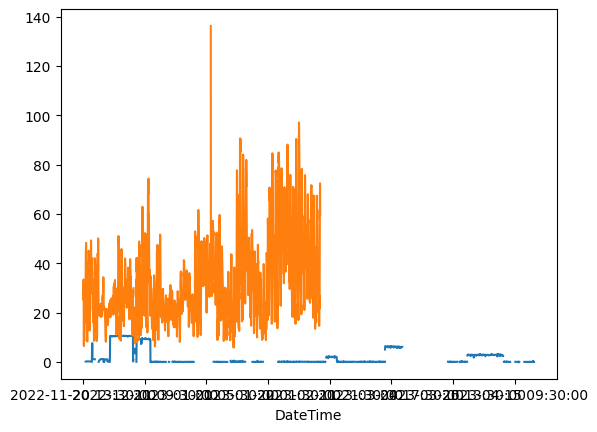

In [6]:
sensor_data_1['value'].plot()
sensor_data_1['reference'].plot()

<Axes: xlabel='DateTime'>

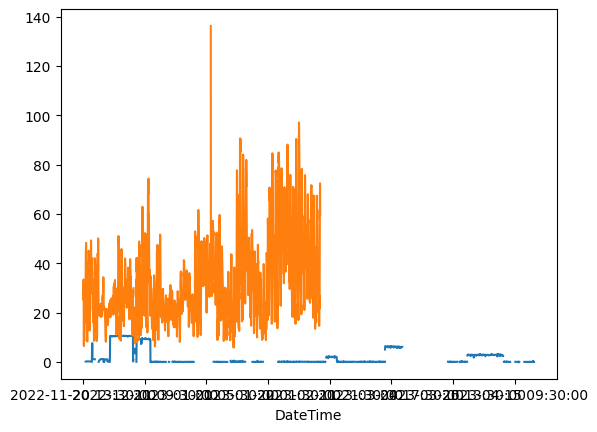

In [7]:
sensor_data_2['value'].plot()
sensor_data_2['reference'].plot()

## Separate reference data and valid sensor data

In [8]:
data_1 = sensor_data_1[sensor_data_1.index <= reference_data_1.index[-1]][sensor_data_1['Tag'] == 'VALID'][['value', 'reference']]
data_1

data_2 = sensor_data_2[sensor_data_2.index <= reference_data_2.index[-1]][sensor_data_2['Tag'] == 'VALID'][['value', 'reference']]
data_2

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_15429/3130610117.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_1 = sensor_data_1[sensor_data_1.index <= reference_data_1.index[-1]][sensor_data_1['Tag'] == 'VALID'][['value', 'reference']]
/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_15429/3130610117.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2 = sensor_data_2[sensor_data_2.index <= reference_data_2.index[-1]][sensor_data_2['Tag'] == 'VALID'][['value', 'reference']]


,value,reference
DateTime,,
2022-11-21 11:30:00,0.140163,45.60
2022-11-21 12:30:00,0.140244,45.87
2022-11-21 13:30:00,0.139122,48.30
2022-11-21 14:30:00,0.162396,45.86
2022-11-21 15:30:00,0.180929,36.80
...,...,...
2023-02-08 04:30:00,0.087088,21.24
2023-02-08 05:30:00,0.087529,23.72
2023-02-08 06:30:00,0.090852,15.47


## Plot sensor vs. reference

Spearmans correlation coefficient: 0.004
Samples are uncorrelated (fail to reject H0) p=0.891
Kendall correlation coefficient: 0.004
Samples are uncorrelated (fail to reject H0) p=0.891


Text(0.05, 0.9, "Kendall's tau=0.009, p<0.05")

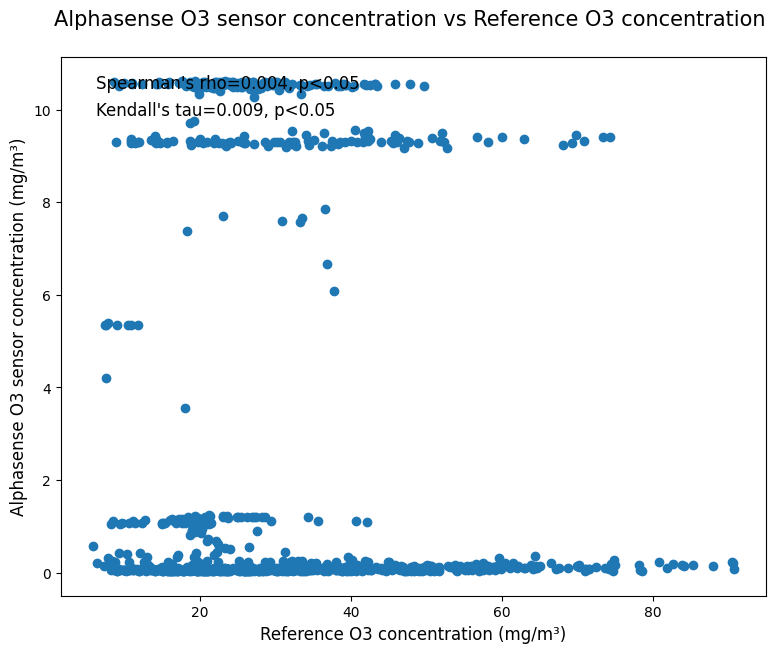

In [9]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(data_1['reference'], data_1['value'])
plt.title('Alphasense O3 sensor concentration vs Reference O3 concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Reference O3 concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Alphasense O3 sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(data_1['reference'], data_1['value'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau( data_1['reference'], data_1['value'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

Spearmans correlation coefficient: 0.004
Samples are uncorrelated (fail to reject H0) p=0.891
Kendall correlation coefficient: 0.004
Samples are uncorrelated (fail to reject H0) p=0.891


Text(0.05, 0.9, "Kendall's tau=0.009, p<0.05")

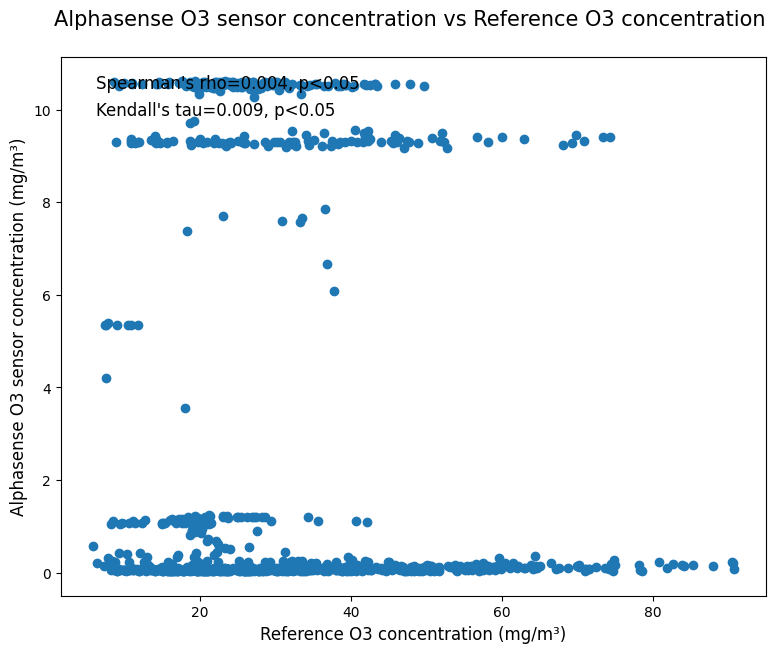

In [10]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(data_2['reference'], data_2['value'])
plt.title('Alphasense O3 sensor concentration vs Reference O3 concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Reference O3 concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Alphasense O3 sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(data_2['reference'], data_2['value'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau( data_2['reference'], data_2['value'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)